In [405]:
import pickle
from keras.models import load_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import datetime as dt # working with time data
import sklearn
from sklearn import linear_model

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [466]:
# !pip install colormap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15631 sha256=5b7e2159d827e85ee3776505d91e8d9215a297c1ddf7bb2c04e2664b53ceb006
  Stored in directory: c:\users\sidizainulabideen.a\appdata\local\pip\cache\wheels\bb\25\18\6b007d77ac1220e0530efa2af14569bb803d77f140366fb313
Successfully built colormap

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [474]:
path = "../Models/"

arimax = pickle.load(open(path+"arimax.sav", 'rb'))

RNN_base = load_model(path+'RNN_base.h5')
RNN_Opt_D_ES = load_model(path+'RNN_optimized_dropout_es.h5')
RNN_Opt = load_model(path+'RNN_optimized.h5')
RNN_Opt_D = load_model(path+'RNN_optimized_es.h5')

LSTM_base = load_model(path+'LSTM_base.h5')
LSTM_Opt_D_ES = load_model(path+'LSTM_optimized_dropout_es.h5')
LSTM_Opt = load_model(path+'LSTM_optimized.h5')
LSTM_Opt_D = load_model(path+'LSTM_optimized_es.h5')

GRU_base = load_model(path+'GRU_base.h5')
GRU_Opt_D_ES = load_model(path+'GRU_optimized_dropout_es.h5')
GRU_Opt = load_model(path+'GRU_optimized.h5')
GRU_Opt_D = load_model(path+'GRU_optimized_es.h5')

ML_Lasso = pickle.load(open(path+'Lasso_Regression.sav','rb'))
ML_Linear = pickle.load(open(path+'Linear_Regression.sav','rb'))
ML_Ridge = pickle.load(open(path+'Ridge_Regression.sav','rb'))



c:\Users\sidizainulabideen.a\.conda\envs\SidiEnv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Lasso from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sidizainulabideen.a\.conda\envs\SidiEnv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sidizainulabideen.a\.conda\envs\SidiEnv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Ridge from version 1.1.1 when using version 1.0.2. 

## Importing the pre-processed dataset

In [542]:
df = pd.read_excel('..\Data\gasoline_price_sentiment_pre-processed_7.xlsx', 'Sheet1')

In [476]:
df.set_index(keys='Date', drop= True, inplace= True)
df.drop('Unnamed: 0', inplace= True, axis= 1)

In [477]:
df.columns

Index(['price', 'popularity', 'general_sentiment', 'positive_outlook',
       'happiness', 'bittersweet', 'confidence', 'disgust', 'disagreement',
       'anxiety', 'gloominess', 'distress', 'violent', 'unexpectedness',
       'timeliness', 'confusion', 'feelingsVsTruth', 'buyVsSell',
       'buyVsSellForecast', 'priceTrend', 'pricePrediction', 'volatile',
       'consumptionCommodity', 'productionCommodity', 'regulatory',
       'supplyDemandBalance', 'supplyDemandBalanceForecast', 'exploration',
       'accidents', 'National_Holiday', 'Weekend', 'Holidays', 'happiness_Log',
       'bittersweet_Log', 'disgust_Log', 'disagreement_Log', 'anxiety_Log',
       'gloominess_Log', 'distress_Log', 'violent_Log', 'unexpectedness_Log',
       'confusion_Log', 'buyVsSell_sqrt', 'pricePrediction_Log',
       'volatile_Log', 'productionCommodity_Log', 'regulatory_Log',
       'supplyDemandBalance_Log', 'exploration_Log', 'accidents_Log',
       'month-1', 'month-2', 'month-3', 'month-4', 'month-5'

In [478]:
selected_variable_columns = ['price', 'happiness_Log', 'bittersweet_Log',
       'disgust_Log', 'disagreement_Log', 'anxiety_Log', 'gloominess_Log',
       'distress_Log', 'violent_Log', 'unexpectedness_Log', 'confusion_Log',
       'buyVsSell_sqrt', 'pricePrediction_Log', 'volatile_Log',
       'productionCommodity_Log', 'regulatory_Log', 'supplyDemandBalance_Log',
       'exploration_Log', 'accidents_Log', 'supplyDemandBalanceForecast', 
       'consumptionCommodity', 'priceTrend', 'buyVsSellForecast', 'feelingsVsTruth',
       'timeliness', 'confidence', 'popularity', 'general_sentiment', 'positive_outlook',
       'price_lag_7', 'price_rm', 'price_ewm', 'month-1', 'month-2', 
       'month-3', 'month-4', 'month-5', 'month-6', 'month-7', 'month-8', 
       'month-9', 'month-10', 'month-11', 'month-12', 'dayofweek-0',
       'dayofweek-1', 'dayofweek-2', 'dayofweek-3', 'dayofweek-4',
       'dayofweek-5', 'dayofweek-6', 'weekend', 'sunday']

selected_variable_columns_ML = ['happiness_Log', 'bittersweet_Log',
       'disgust_Log', 'disagreement_Log', 'anxiety_Log', 'gloominess_Log',
       'distress_Log', 'violent_Log', 'unexpectedness_Log', 'confusion_Log',
       'buyVsSell_sqrt', 'pricePrediction_Log', 'volatile_Log',
       'productionCommodity_Log', 'regulatory_Log', 'supplyDemandBalance_Log',
       'exploration_Log', 'accidents_Log', 'supplyDemandBalanceForecast', 
       'consumptionCommodity', 'priceTrend', 'buyVsSellForecast', 'feelingsVsTruth',
       'timeliness', 'confidence', 'popularity', 'general_sentiment', 'positive_outlook', 'month-1', 'month-2', 
       'month-3', 'month-4', 'month-5', 'month-6', 'month-7', 'month-8', 
       'month-9', 'month-10', 'month-11', 'month-12', 'dayofweek-0',
       'dayofweek-1', 'dayofweek-2', 'dayofweek-3', 'dayofweek-4',
       'dayofweek-5', 'dayofweek-6', 'weekend', 'sunday']
#We are taking the transformed columns and the derived features

df_subset = df[selected_variable_columns]

## Train-test split

In [543]:
tr_start = '2010-01-08'
te_start = '2017-04-01' 
te_end = '2018-12-31'
tr_end = '2017-03-31'

In [480]:
def splitdataset(df_subset):
    tr_start = '2010-01-08'
    te_start = '2017-04-01' 
    te_end = '2018-12-31'
    tr_end = '2017-03-31'

    train = df_subset[tr_start : tr_end]
    test = df_subset[te_start : te_end]

    return (train,test)


In [481]:
def splitdatasetML(xlagged,y):
    tr_start = '2010-01-08'
    te_start = '2017-04-01' 
    te_end = '2018-12-31'
    tr_end = '2017-03-31'

    x_train = xlagged[tr_start:tr_end]

    x_test = xlagged[te_start:te_end]

    y_train = y[tr_start:tr_end]

    y_test = y[te_start:te_end]

    return (x_test,x_train,y_train,y_test)

In [482]:
train,test = splitdataset(df_subset)

In [483]:
def create_lagged_features(df, col, lag_number = 7):
    
    df[col]=df[col].shift(lag_number)
    
    return(df)

In [484]:
X_ML = df[selected_variable_columns]

engineered_features = X_ML[['price_lag_7', 'price_rm', 'price_ewm']]



X_ML.drop(['price_lag_7', 'price_rm', 'price_ewm'], inplace= True, axis = 1)

print(X_ML.shape)

ML_X = create_lagged_features(X_ML, selected_variable_columns_ML, lag_number = 7)

ML_X = pd.concat([ML_X, engineered_features], axis = 1)

ML_X.drop(['price'], inplace= True, axis = 1)

C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\829231875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ML.drop(['price_lag_7', 'price_rm', 'price_ewm'], inplace= True, axis = 1)
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\446963715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].shift(lag_number)


(3287, 50)


In [485]:
ML_X = ML_X.dropna()

In [486]:
ML_X.shape

(3280, 52)

In [487]:
x_test,x_train,y_train,y_test = splitdatasetML(ML_X,df_subset['price'])

## Standardization of Independent Variables

In [488]:
def Standardization_Dataset(train,test):

    x_scaler = StandardScaler()
    x_scaled = x_scaler.fit_transform(train.iloc[:, 1:])
    y = np.reshape(np.array(train.iloc[:,0]), (-1,1))
    train_scaled = np.hstack((x_scaled, y))
    x_scaled = x_scaler.fit_transform(test.iloc[:, 1:])
    y = np.reshape(np.array(test.iloc[:,0]), (-1,1))
    test_scaled = np.hstack((x_scaled, y))

    return (train_scaled, test_scaled,x_scaler)



In [489]:
def Standardization_Dataset_ML(MLtestLagged_X,x_scaler):

    x_scaled = x_scaler.fit_transform(MLtestLagged_X)

    return (x_scaled)

In [490]:
train_scaled, test_scaled,x_scaler = Standardization_Dataset(train,test)


In [491]:
MLtestLagged_X_Scaled= Standardization_Dataset_ML(x_test,x_scaler)

In [492]:
MLtestLagged_X_Scaled.shape

(640, 52)

## Preparing dataset for modelling

### Machine Learning Dataset Preparation

In [493]:
# def create_lagged_features(df, col, lag_number = 7):
    
#     df[col]=df[col].shift(lag_number)
    
#     return(df)



In [494]:
#Defining a function to split multivariate sequences into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### Deep Learning lagged

In [495]:
x_trainDL, y_testDLDL = split_sequences(train_scaled, 7)

In [496]:
x_testDL, y_testDL = split_sequences(test_scaled, 7)

In [497]:
print(x_testDL.shape)
print(y_testDL.shape)

(634, 7, 52)
(634,)


### Machine Learning Lagged

In [498]:
# from sklearn.linear_model import LinearRegression
# MLtestLagged_X_Scaled 

In [499]:
# MLtestLagged_X_Scaled

In [500]:
# pred_lrTest = pd.Series(reg.predict(MLtestLagged_X_Scaled), index = y_test[7:].index)
# print("MSE for Train :",mean_squared_error(y_test[7:], pred_lrTest, squared=False))
# print("RMSE for Train :",np.sqrt(mean_squared_error(y_test[7:], pred_lrTest, squared=True)))
# print("MAPE for Train :",mean_absolute_percentage_error(y_test[7:], pred_lrTest))

# print('Training score :', mean_absolute_percentage_error(y_test[7:], pred_lrTest))

# y_train.plot(label='true', figsize=(10,6))
# pred_lrTrain.plot(label='linear_regression')

## Model-building

### Setting seed

In [501]:
#Set seed to ensure reproducibility
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

#Setting seed value as 7
set_seed(7)


### Model Comparison


#### Arima

In [544]:
from sklearn.metrics import mean_squared_error
exog_features = df_subset.drop(axis=1, columns='price').columns
exog_test = df_subset[te_start : te_end].loc[:, exog_features]
tes = df_subset[te_start : te_end].loc[:, 'price']

print(exog_test.shape)

st = str(exog_test.reset_index().iloc[0, 0])[:10]
en = str(exog_test.reset_index().iloc[-1, 0])[:10]



ArimaxPred = arimax.predict(st, en, exog = exog_test)
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,ArimaxPred)))
print('The MSE for the ARIMAX model model is: {0:.2f}'.format(mean_squared_error(tes,ArimaxPred)))
print('The RMSE for the ARIMAX model model is: {0:.2f}'.format(np.sqrt(mean_squared_error(tes,ArimaxPred))))
print('The MAPE for the ARIMAX model model is {0:.2f}'.format(mean_absolute_percentage_error(tes,ArimaxPred)))

(640, 52)
ARIMAX model MSE:0.4808468965137774
The MSE for the ARIMAX model model is: 0.48
The RMSE for the ARIMAX model model is: 0.69
The MAPE for the ARIMAX model model is 0.01


In [503]:
type(arimax)

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

In [504]:
ArimaxPred

2017-04-01    66.419143
2017-04-02    66.629836
2017-04-03    67.033609
2017-04-04    66.590841
2017-04-05    67.459957
                ...    
2018-12-27    56.121542
2018-12-28    56.369570
2018-12-29    55.957982
2018-12-30    55.925397
2018-12-31    55.856314
Freq: D, Name: predicted_mean, Length: 640, dtype: float64

In [505]:
ArimaxPred.index = ArimaxPred.index.to_timestamp()

In [506]:
ArimaxPred

2017-04-01    66.419143
2017-04-02    66.629836
2017-04-03    67.033609
2017-04-04    66.590841
2017-04-05    67.459957
                ...    
2018-12-27    56.121542
2018-12-28    56.369570
2018-12-29    55.957982
2018-12-30    55.925397
2018-12-31    55.856314
Freq: D, Name: predicted_mean, Length: 640, dtype: float64

#### RNN

In [507]:
pred_RNN = RNN_base.predict(x_testDL)
print('The MSE for the baseline RNN model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_RNN)))
print('The RMSE for the baseline RNN model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_RNN))))
print('The MAPE for the baseline RNN model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_RNN)))

20/20 [==============================] - 1s 7ms/step
The MSE for the baseline RNN model is: 803.47
The RMSE for the baseline RNN model is: 28.35
The MAPE for the baseline RNN model is 0.29


In [508]:
pred_RNN_Opt = RNN_Opt.predict(x_testDL)
print('The MSE for the Opt RNN model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_RNN_Opt)))
print('The RMSE for the Opt RNN model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt))))
print('The MAPE for the Opt RNN model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt)))

20/20 [==============================] - 1s 6ms/step
The MSE for the Opt RNN model is: 768.88
The RMSE for the Opt RNN model is: 27.73
The MAPE for the Opt RNN model is 0.28


In [509]:
pred_RNN_Opt_D = RNN_Opt_D.predict(x_testDL)
print('The MSE for the Opt Dropout RNN model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_RNN_Opt_D)))
print('The RMSE for the Opt Dropout RNN model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt_D))))
print('The MAPE for the Opt Dropout RNN model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt_D)))

20/20 [==============================] - 1s 6ms/step
The MSE for the Opt Dropout RNN model is: 801.39
The RMSE for the Opt Dropout RNN model is: 28.31
The MAPE for the Opt Dropout RNN model is 0.29


In [510]:
pred_RNN_Opt_D_ES = RNN_Opt_D_ES.predict(x_testDL)
print('The MSE for the Opt Dropout RNN Early Stop model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_RNN_Opt_D_ES)))
print('The RMSE for the Opt Dropout RNN Early Stop model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt_D_ES))))
print('The MAPE for the Opt Dropout RNN Early Stop model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt_D_ES)))

20/20 [==============================] - 1s 5ms/step
The MSE for the Opt Dropout RNN Early Stop model is: 282.41
The RMSE for the Opt Dropout RNN Early Stop model is: 16.81
The MAPE for the Opt Dropout RNN Early Stop model is 0.16


#### LSTM

In [511]:
pred_LSTM = LSTM_base.predict(x_testDL)
print('The MSE for the baseline LSTM model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_LSTM)))
print('The RMSE for the baseline LSTM model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_LSTM))))
print('The MAPE for the baseline LSTM model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_LSTM)))

20/20 [==============================] - 1s 7ms/step
The MSE for the baseline LSTM model is: 841.37
The RMSE for the baseline LSTM model is: 29.01
The MAPE for the baseline LSTM model is 0.30


In [512]:
pred_LSTM_Opt = LSTM_Opt.predict(x_testDL)
print('The MSE for the Opt LSTM model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_LSTM_Opt)))
print('The RMSE for the Opt LSTM model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt))))
print('The MAPE for the Opt LSTM model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt)))

20/20 [==============================] - 1s 8ms/step
The MSE for the Opt LSTM model is: 923.34
The RMSE for the Opt LSTM model is: 30.39
The MAPE for the Opt LSTM model is 0.32


In [513]:
pred_LSTM_Opt_D = LSTM_Opt_D.predict(x_testDL)
print('The MSE for the Opt Dropout LSTM model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_LSTM_Opt_D)))
print('The RMSE for the Opt Dropout LSTM model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt_D))))
print('The MAPE for the Opt Dropout LSTM model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt_D)))

20/20 [==============================] - 1s 8ms/step
The MSE for the Opt Dropout LSTM model is: 575.41
The RMSE for the Opt Dropout LSTM model is: 23.99
The MAPE for the Opt Dropout LSTM model is 0.25


In [514]:
pred_LSTM_Opt_D_ES = LSTM_Opt_D_ES.predict(x_testDL)
print('The MSE for the Opt Dropout LSTM Early Stop model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_LSTM_Opt_D_ES)))
print('The RMSE for the Opt Dropout LSTM Early Stop model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt_D_ES))))
print('The MAPE for the Opt Dropout RLSTM Early Stop model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt_D_ES)))

20/20 [==============================] - 1s 7ms/step
The MSE for the Opt Dropout LSTM Early Stop model is: 557.81
The RMSE for the Opt Dropout LSTM Early Stop model is: 23.62
The MAPE for the Opt Dropout RLSTM Early Stop model is 0.24


#### GRU

In [518]:
pred_GRU = GRU_base.predict(x_testDL)
print('The MSE for the baseline GRU model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_GRU)))
print('The RMSE for the baseline GRU model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_GRU))))
print('The MAPE for the baseline GRU model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_GRU)))

20/20 [==============================] - 1s 7ms/step
The MSE for the baseline GRU model is: 792.93
The RMSE for the baseline GRU model is: 28.16
The MAPE for the baseline GRU model is 0.29


In [519]:
pred_GRU_Opt = GRU_Opt.predict(x_testDL)
print('The MSE for the Opt GRU model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_GRU_Opt)))
print('The RMSE for the Opt GRU model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt))))
print('The MAPE for the Opt GRU model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt)))

20/20 [==============================] - 1s 6ms/step
The MSE for the Opt GRU model is: 854.53
The RMSE for the Opt GRU model is: 29.23
The MAPE for the Opt GRU model is 0.31


In [520]:
pred_GRU_Opt_D = GRU_Opt_D.predict(x_testDL)
print('The MSE for the Opt Dropout GRU model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_GRU_Opt_D)))
print('The RMSE for the Opt Dropout GRU model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt_D))))
print('The MAPE for the Opt Dropout GRU model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt_D)))

20/20 [==============================] - 1s 7ms/step
The MSE for the Opt Dropout GRU model is: 749.62
The RMSE for the Opt Dropout GRU model is: 27.38
The MAPE for the Opt Dropout GRU model is 0.28


In [521]:
pred_GRU_Opt_D_ES = GRU_Opt_D_ES.predict(x_testDL)
print('The MSE for the Opt Dropout GRU Early Stop model is: {0:.2f}'.format(mean_squared_error(y_testDL, pred_GRU_Opt_D_ES)))
print('The RMSE for the Opt Dropout GRU Early Stop model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt_D_ES))))
print('The MAPE for the Opt Dropout GRU Early Stop model is {0:.2f}'.format(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt_D_ES)))

20/20 [==============================] - 1s 6ms/step
The MSE for the Opt Dropout GRU Early Stop model is: 472.60
The RMSE for the Opt Dropout GRU Early Stop model is: 21.74
The MAPE for the Opt Dropout GRU Early Stop model is 0.22


### ML

In [515]:
pred_Lasso = pd.Series(ML_Lasso.predict(MLtestLagged_X_Scaled),index = y_test.index)
print('The MSE for the Lasso model is: {0:.2f}'.format(mean_squared_error(y_test, pred_Lasso)))
print('The RMSE for the Lasso model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, pred_Lasso))))
print('The MAPE for the Lasso model is {0:.2f}'.format(mean_absolute_percentage_error(y_test, pred_Lasso)))

The MSE for the Lasso model is: 806.41
The RMSE for the Lasso model is: 28.40
The MAPE for the Lasso model is 0.30


In [516]:
pred_Ridge = pd.Series(ML_Ridge.predict(MLtestLagged_X_Scaled),index = y_test.index)
print('The MSE for the Ridge model is: {0:.2f}'.format(mean_squared_error(y_test, pred_Ridge)))
print('The RMSE for the Ridge model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, pred_Ridge))))
print('The MAPE for the Ridge model is {0:.2f}'.format(mean_absolute_percentage_error(y_test, pred_Ridge)))

The MSE for the Ridge model is: 803.45
The RMSE for the Ridge model is: 28.35
The MAPE for the Ridge model is 0.30


In [517]:
pred_Linear = pd.Series(ML_Linear.predict(MLtestLagged_X_Scaled),index = y_test.index)
print('The MSE for the Ridge model is: {0:.2f}'.format(mean_squared_error(y_test, pred_Linear)))
print('The RMSE for the Ridge model is: {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, pred_Linear))))
print('The MAPE for the Ridge model is {0:.2f}'.format(mean_absolute_percentage_error(y_test, pred_Linear)))

The MSE for the Ridge model is: 806.12
The RMSE for the Ridge model is: 28.39
The MAPE for the Ridge model is 0.30


In [525]:
ArimaxMSE=(mean_squared_error(tes,ArimaxPred))
ArimaxRMSE=np.sqrt(mean_squared_error(tes,ArimaxPred))
ArimaxMAPE=(mean_absolute_percentage_error(tes,ArimaxPred))

RNNMSE=(mean_squared_error(y_testDL, pred_RNN))
RNNRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_RNN)))
RNNMAPE=(mean_absolute_percentage_error(y_testDL, pred_RNN))

OPTRNNMSE=(mean_squared_error(y_testDL, pred_RNN_Opt))
OPTRNNRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt)))
OPTRNNMAPE=(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt))

OPT_D_RNNMSE=(mean_squared_error(y_testDL, pred_RNN_Opt_D))
OPT_D_RNNRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt_D)))
OPT_D_RNNMAPE=(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt_D))

OPT_D_ES_RNNMSE=(mean_squared_error(y_testDL, pred_RNN_Opt_D_ES))
OPT_D_ES_RNNRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_RNN_Opt_D_ES)))
OPT_D_ES_RNNMAPE=(mean_absolute_percentage_error(y_testDL, pred_RNN_Opt_D_ES))

LSTMMSE=(mean_squared_error(y_testDL, pred_LSTM))
LSTMRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_LSTM)))
LSTMMAPE=(mean_absolute_percentage_error(y_testDL, pred_LSTM))

OPTLSTMMSE=(mean_squared_error(y_testDL, pred_LSTM_Opt))
OPTLSTMRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt)))
OPTLSTMMAPE=(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt))

OPT_D_LSTMMSE=(mean_squared_error(y_testDL, pred_LSTM_Opt_D))
OPT_D_LSTMRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt_D)))
OPT_D_LSTMMAPE=(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt_D))

OPT_D_ES_LSTMMSE=(mean_squared_error(y_testDL, pred_LSTM_Opt_D_ES))
OPT_D_ES_LSTMRMSE=(np.sqrt(mean_squared_error(y_testDL, pred_LSTM_Opt_D_ES)))
OPT_D_ES_LSTMMAPE=(mean_absolute_percentage_error(y_testDL, pred_LSTM_Opt_D_ES))

GRUMSE=(mean_squared_error(y_testDL, pred_GRU))
GRURMSE=(np.sqrt(mean_squared_error(y_testDL, pred_GRU)))
GRUMAPE=(mean_absolute_percentage_error(y_testDL, pred_GRU))

OPTGRUMSE=(mean_squared_error(y_testDL, pred_GRU_Opt))
OPTGRURMSE=(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt)))
OPTGRUMAPE=(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt))

OPT_D_GRUMSE=(mean_squared_error(y_testDL, pred_GRU_Opt_D))
OPT_D_GRURMSE=(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt_D)))
OPT_D_GRUMAPE=(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt_D))

OPT_D_ES_GRUMSE=(mean_squared_error(y_testDL, pred_GRU_Opt_D_ES))
OPT_D_ES_GRURMSE=(np.sqrt(mean_squared_error(y_testDL, pred_GRU_Opt_D_ES)))
OPT_D_ES_GRUMAPE=(mean_absolute_percentage_error(y_testDL, pred_GRU_Opt_D_ES))

LassoMSE=mean_squared_error(y_test, pred_Lasso)
LassoRMSE=(np.sqrt(mean_squared_error(y_test, pred_Lasso)))
LassoMAPE=(mean_absolute_percentage_error(y_test, pred_Lasso))

RidgeMSE=(mean_squared_error(y_test, pred_Ridge))
RidgeRMSE=(np.sqrt(mean_squared_error(y_test, pred_Ridge)))
RidgeMAPE=(mean_absolute_percentage_error(y_test, pred_Ridge))

LinearMSE=(mean_squared_error(y_test, pred_Linear))
LinearRMSE=(np.sqrt(mean_squared_error(y_test, pred_Linear)))
LinearMAPE=(mean_absolute_percentage_error(y_test, pred_Linear))

In [526]:
def Model_Evaluation_Rank_Base(GR_Result):

    Gr_Df=GR_Result

    for i in Gr_Df.index:
        check = 0

        sum=Gr_Df['Rank MSE'][i]+Gr_Df['Rank RMSE'][i]+Gr_Df['Rank MAPE'][i]

        if sum == 3:
            check = 1
            ModelName=Gr_Df['Model'][i]
            print("Model of {}".format(ModelName) + " achieve all rank 1 for metrics evaluation.")
            print("Suggest using {}".format(ModelName))

            break
            


    if check == 0:
        ModelName=Gr_Df.loc[(Gr_Df['Rank MAPE'] == 1), 'Model'].iloc[0]
        print("Model of {}".format(ModelName) + " achieve rank 1 for MAPE.")
        print("Suggest to check the dataframe and plot comparison on test set")
        Gr_Df

    
    

In [527]:
ModelComparison = pd.DataFrame(columns=['Model','MSE','RMSE','MAPE'])

new_row = {'Model':'Arima', 'MSE':ArimaxMSE, 'RMSE':ArimaxRMSE, 'MAPE':ArimaxMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)


new_row = {'Model':'RNN', 'MSE':RNNMSE, 'RMSE':RNNRMSE, 'MAPE':RNNMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'RNN_OPT', 'MSE':OPTRNNMSE, 'RMSE':OPTRNNRMSE, 'MAPE':OPTRNNMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'RNN_OPT_D', 'MSE':OPT_D_RNNMSE, 'RMSE':OPT_D_RNNRMSE, 'MAPE':OPT_D_RNNMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'RNN_OPT_D_ES', 'MSE':OPT_D_ES_RNNMSE, 'RMSE':OPT_D_ES_RNNRMSE, 'MAPE':OPT_D_ES_RNNMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)


new_row = {'Model':'GRU', 'MSE':GRUMSE, 'RMSE':GRURMSE, 'MAPE':GRUMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'GRU_OPT', 'MSE':OPTGRUMSE, 'RMSE':OPTGRURMSE, 'MAPE':OPTGRUMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'GRU_OPT_D', 'MSE':OPT_D_GRUMSE, 'RMSE':OPT_D_GRURMSE, 'MAPE':OPT_D_GRUMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'GRU_OPT_D_ES', 'MSE':OPT_D_ES_GRUMSE, 'RMSE':OPT_D_ES_GRURMSE, 'MAPE':OPT_D_ES_GRUMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'LSTM', 'MSE':LSTMMSE, 'RMSE':LSTMRMSE, 'MAPE':LSTMMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'LSTM_OPT', 'MSE':OPTLSTMMSE, 'RMSE':OPTLSTMRMSE, 'MAPE':OPTLSTMMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'LSTM_OPT_D', 'MSE':OPT_D_LSTMMSE, 'RMSE':OPT_D_LSTMRMSE, 'MAPE':OPT_D_LSTMMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'LSTM_OPT_D_ES', 'MSE':OPT_D_ES_LSTMMSE, 'RMSE':OPT_D_ES_LSTMRMSE, 'MAPE':OPT_D_ES_LSTMMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)


new_row = {'Model':'Lasso', 'MSE':LassoMSE, 'RMSE':LassoRMSE, 'MAPE':LassoMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'Ridge', 'MSE':RidgeMSE, 'RMSE':RidgeRMSE, 'MAPE':RidgeMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

new_row = {'Model':'Linear', 'MSE':LinearMSE, 'RMSE':LinearRMSE, 'MAPE':LinearMAPE}
ModelComparison = ModelComparison.append(new_row, ignore_index=True)

ModelComparison['Rank MSE'] = ModelComparison['MSE'].rank(ascending = True)
ModelComparison['Rank RMSE'] = ModelComparison['RMSE'].rank(ascending = True)
ModelComparison['Rank MAPE'] = ModelComparison['MAPE'].rank(ascending = True)

Model_Evaluation_Rank_Base(ModelComparison)



C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\920585166.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ModelComparison = ModelComparison.append(new_row, ignore_index=True)
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\920585166.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ModelComparison = ModelComparison.append(new_row, ignore_index=True)
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\920585166.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ModelComparison = ModelComparison.append(new_row, ignore_index=True)
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\920585166.py:14: FutureWarning: The frame.append method is deprecated and will be r

Model of Arima achieve all rank 1 for metrics evaluation.
Suggest using Arima


C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\920585166.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ModelComparison = ModelComparison.append(new_row, ignore_index=True)


In [528]:
ModelComparison

,Model,MSE,RMSE,MAPE,Rank MSE,Rank RMSE,Rank MAPE
0,Arima,0.480847,0.693431,0.006893,1.0,1.0,1.0
1,RNN,803.471095,28.345566,0.292678,11.0,11.0,10.0
2,RNN_OPT,768.881366,27.72871,0.283834,7.0,7.0,6.0
3,RNN_OPT_D,801.385703,28.308757,0.287185,9.0,9.0,8.0
4,RNN_OPT_D_ES,282.412011,16.805119,0.160293,2.0,2.0,2.0
5,GRU,792.926785,28.158956,0.288617,8.0,8.0,9.0
6,GRU_OPT,854.533657,29.232408,0.307432,15.0,15.0,15.0
7,GRU_OPT_D,749.618105,27.379155,0.284273,6.0,6.0,7.0
8,GRU_OPT_D_ES,472.601374,21.739397,0.220161,3.0,3.0,3.0
9,LSTM,841.367953,29.006343,0.29836,14.0,14.0,14.0


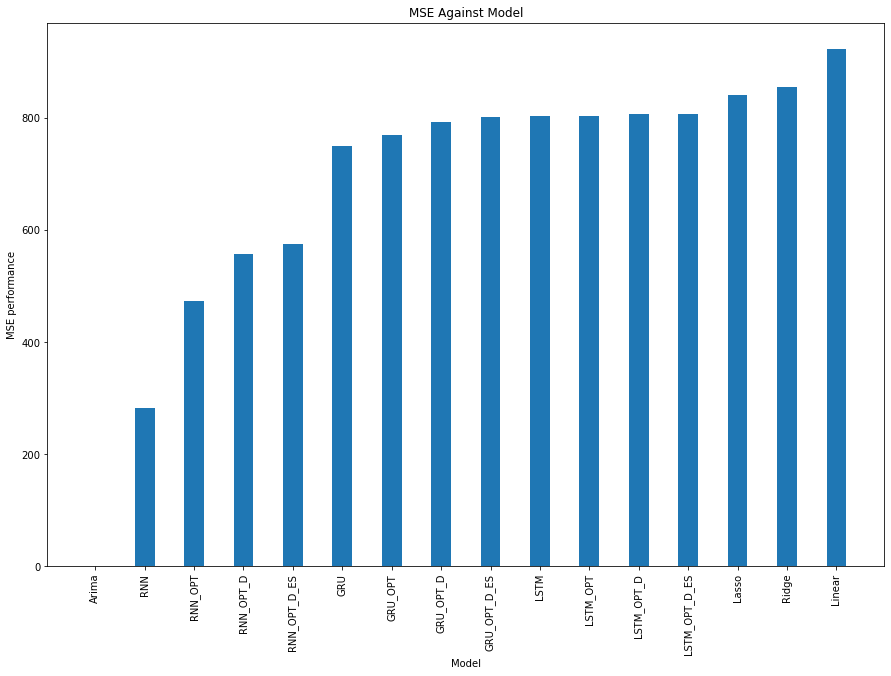

In [601]:
fig = plt.figure(figsize = (15, 10))

df_sorted = ModelComparison.sort_values('MSE')
# creating the bar plot
plt.bar(ModelComparison['Model'], df_sorted['MSE'], width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("MSE performance")
plt.title("MSE Against Model")
plt.show()

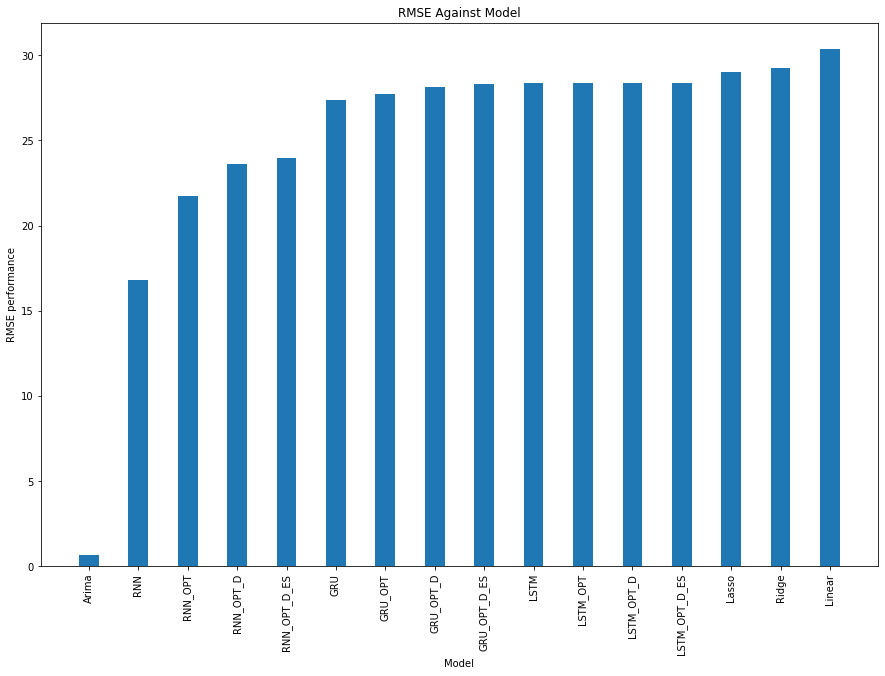

In [602]:
fig = plt.figure(figsize = (15, 10))

df_sorted = ModelComparison.sort_values('RMSE')
# creating the bar plot
plt.bar(ModelComparison['Model'], df_sorted['RMSE'], width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("RMSE performance")
plt.title("RMSE Against Model")
plt.show()

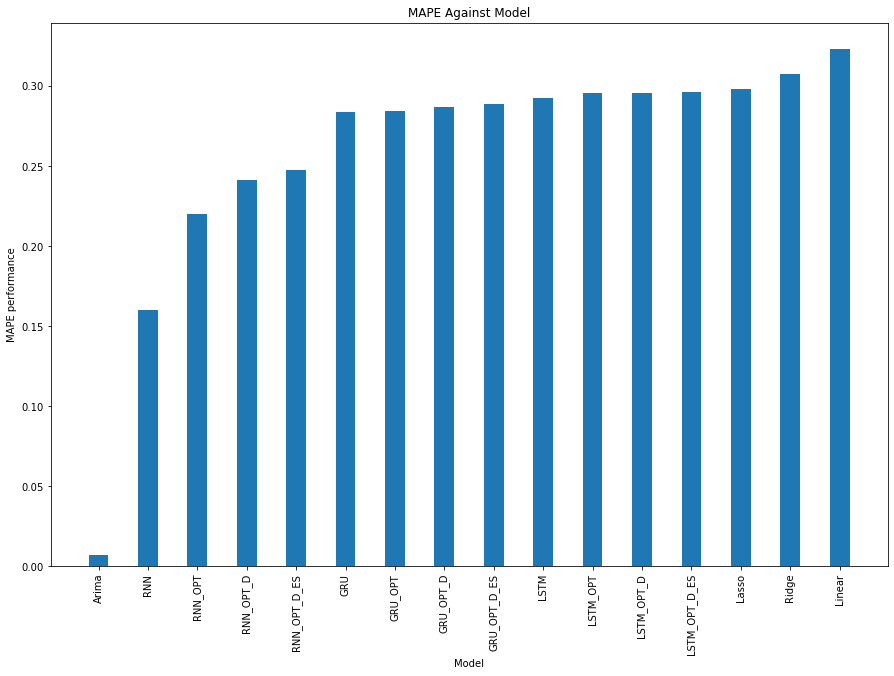

In [600]:
fig = plt.figure(figsize = (15, 10))

df_sorted = ModelComparison.sort_values('MAPE')
# creating the bar plot
plt.bar(ModelComparison['Model'], df_sorted['MAPE'], width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("MAPE performance")
plt.title("MAPE Against Model")
plt.show()

### White Noise 

In [382]:
#

### Plot Comparison


In [529]:
def arr_to_df(df1, rownum = 634, start_date = '2017-04-07', end_date = '2018-12-31'):
    """Convert output of DL models to pd.DataFrame for easy plotting."""
    #Changing the provided numpy array to pd.DataFrame
    df1 = pd.DataFrame(np.reshape(df1, (rownum)))
    #Subsetting the dates from reference dataframe
    dates = pd.DataFrame(df[start_date: end_date].index)
    #Concatenating the dates with the provided dataframe
    df1 =pd.concat([df1, dates], axis = 1)
    #Setting the dates as index
    df1.set_index('Date', drop = True, inplace= True)
    return(df1)

RNN_Pred = arr_to_df(pred_RNN)
RNN_OPT_Pred = arr_to_df(pred_RNN_Opt)
RNN_OPT_D_Pred = arr_to_df(pred_RNN_Opt_D)
RNN_OPT_D_ES_Pred = arr_to_df(pred_RNN_Opt_D_ES)

LSTM_Pred = arr_to_df(pred_LSTM)
LSTM_OPT_Pred = arr_to_df(pred_LSTM_Opt)
LSTM_OPT_D_Pred = arr_to_df(pred_LSTM_Opt_D)
LSTM_OPT_D_ES_Pred = arr_to_df(pred_LSTM_Opt_D_ES)

GRU_Pred = arr_to_df(pred_GRU)
GRU_OPT_Pred = arr_to_df(pred_GRU_Opt)
GRU_OPT_D_Pred = arr_to_df(pred_GRU_Opt_D)
GRU_OPT_D_ES_Pred = arr_to_df(pred_GRU_Opt_D_ES)



In [467]:
list(np.random.choice(range(256), size=3))

[185, 142, 23]

In [469]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

#A54DCA


In [532]:
def GenerateColour():
    import random
    r = lambda: random.randint(0,255)
    colour ='#%02X%02X%02X' % (r(),r(),r())    


    return (colour)


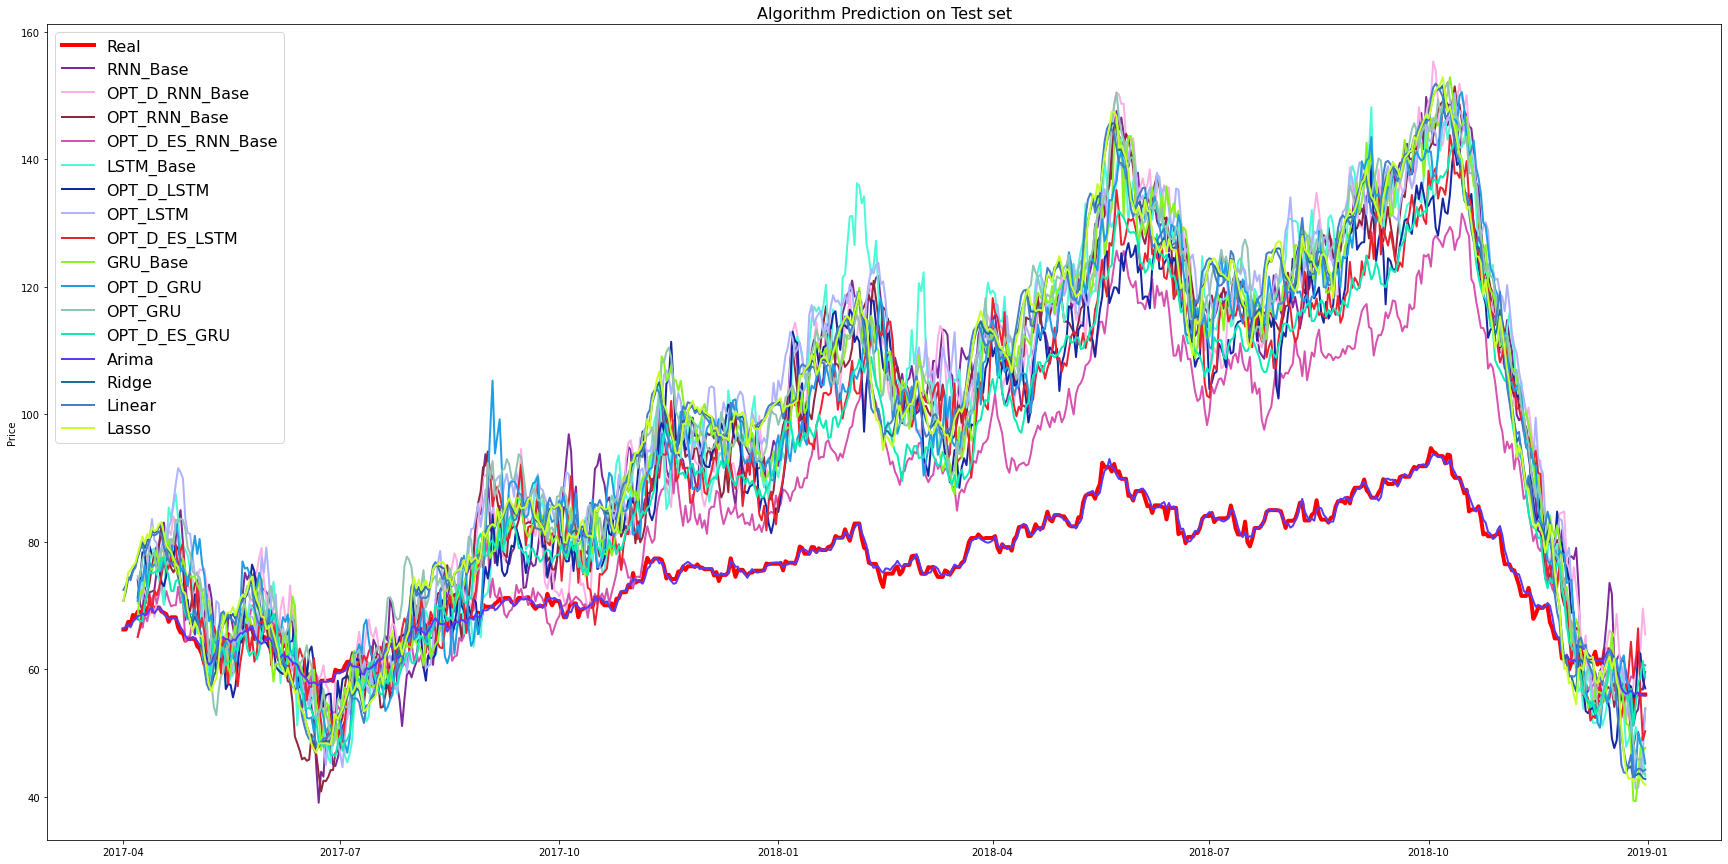

In [533]:
from turtle import color


fig, ax = plt.subplots(1, figsize=(30, 15))
ax.plot(tes, label='Real', linewidth=4, color='red')

ax.plot(RNN_Pred, label='RNN_Base', linewidth=2,color=GenerateColour())
ax.plot(RNN_OPT_D_Pred, label='OPT_D_RNN_Base', linewidth=2,color=GenerateColour())
ax.plot(RNN_OPT_Pred, label='OPT_RNN_Base', linewidth=2,color=GenerateColour())
ax.plot(RNN_OPT_D_ES_Pred, label='OPT_D_ES_RNN_Base', linewidth=2,color=GenerateColour())

ax.plot(LSTM_Pred, label='LSTM_Base', linewidth=2,color=GenerateColour())
ax.plot(LSTM_OPT_D_Pred, label='OPT_D_LSTM', linewidth=2,color=GenerateColour())
ax.plot(LSTM_OPT_Pred, label='OPT_LSTM', linewidth=2,color=GenerateColour())
ax.plot(LSTM_OPT_D_ES_Pred, label='OPT_D_ES_LSTM', linewidth=2,color=GenerateColour())

ax.plot(GRU_Pred, label='GRU_Base', linewidth=2,color=GenerateColour())
ax.plot(GRU_OPT_D_Pred, label='OPT_D_GRU', linewidth=2,color=GenerateColour())
ax.plot(GRU_OPT_Pred, label='OPT_GRU', linewidth=2,color=GenerateColour())
ax.plot(GRU_OPT_D_ES_Pred, label='OPT_D_ES_GRU', linewidth=2,color=GenerateColour())

ax.plot(ArimaxPred, label='Arima', linewidth=2, color=GenerateColour())

ax.plot(pred_Ridge, label='Ridge', linewidth=2,color=GenerateColour())
ax.plot(pred_Linear, label='Linear', linewidth=2,color=GenerateColour())
ax.plot(pred_Lasso, label='Lasso', linewidth=2,color=GenerateColour())

ax.set_ylabel('Price')
ax.set_title('Algorithm Prediction on Test set', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

#change real to different colourt

## Predict the next 7 day price

In [258]:
SevenDaysToPredict = df_subset.tail(13)

te_start = SevenDaysToPredict.index.min()
te_end = SevenDaysToPredict.index.max()

In [259]:
print(te_start)

2018-12-19 00:00:00


In [260]:
from datetime import datetime, timedelta
    
d = te_end + timedelta(days=1)

In [261]:
dti = pd.date_range(d, periods=7, freq="D")
dd = pd.DataFrame(pd.date_range(d, periods=7, freq="D"))
dd.rename(columns = {dd.columns[0]:'Date'}, inplace = True)
dd.set_index(keys='Date', drop= True, inplace= True)
dd

""
Date
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07


### Arima Forecast 7 days

In [262]:
#arima only need 7 days before to predict.
SevenDaysToPredictArima = df_subset.tail(7)

SevenDaysToPredictArima

,price,happiness_Log,bittersweet_Log,disgust_Log,disagreement_Log,anxiety_Log,gloominess_Log,distress_Log,violent_Log,unexpectedness_Log,...,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-25,56.906192,0.001523,0.001523,0.003886,0.026746,0.007515,0.054204,0.064133,0.075361,0.001523,...,1,0,1,0,0,0,0,0,0,0
2018-12-26,53.425344,0.029797,0.010036,0.003995,-0.004322,0.007022,0.021375,0.022784,0.010036,0.001237,...,1,0,0,1,0,0,0,0,0,0
2018-12-27,55.956283,0.004898,0.000031,0.002467,0.013357,0.008773,0.015040,0.023654,0.026271,0.000519,...,1,0,0,0,1,0,0,0,0,0
2018-12-28,56.043514,0.008539,0.001984,-0.000320,0.000009,0.004611,0.030511,0.033064,0.023133,0.001326,...,1,0,0,0,0,1,0,0,0,0
2018-12-29,56.043514,0.005656,0.003743,0.002063,-0.004642,0.002063,0.039399,0.042366,0.009745,0.000005,...,1,0,0,0,0,0,1,0,1,0
2018-12-30,56.043514,0.005449,0.002456,0.008150,-0.011601,0.000024,0.016210,0.008824,0.012188,0.001383,...,1,0,0,0,0,0,0,1,1,1
2018-12-31,56.043514,0.009354,0.003401,0.003139,-0.000502,0.007800,0.052269,0.032805,0.019615,0.004176,...,1,1,0,0,0,0,0,0,0,0


In [571]:
exog_features_first640 = exog_test.copy()
exog_features_forecasted = SevenDaysToPredictArima.drop(axis=1, columns='price').columns
exog_features_forecasted = SevenDaysToPredictArima[te_start : te_end].loc[:, exog_features_forecasted]
exog_features_forecasted.index = ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07']
exog_features_forecasted

,happiness_Log,bittersweet_Log,disgust_Log,disagreement_Log,anxiety_Log,gloominess_Log,distress_Log,violent_Log,unexpectedness_Log,confusion_Log,...,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday
2019-01-01,0.001523,0.001523,0.003886,0.026746,0.007515,0.054204,0.064133,0.075361,0.001523,0.004524,...,1,0,1,0,0,0,0,0,0,0
2019-01-02,0.029797,0.010036,0.003995,-0.004322,0.007022,0.021375,0.022784,0.010036,0.001237,0.022784,...,1,0,0,1,0,0,0,0,0,0
2019-01-03,0.004898,0.000031,0.002467,0.013357,0.008773,0.015040,0.023654,0.026271,0.000519,0.007322,...,1,0,0,0,1,0,0,0,0,0
2019-01-04,0.008539,0.001984,-0.000320,0.000009,0.004611,0.030511,0.033064,0.023133,0.001326,0.009845,...,1,0,0,0,0,1,0,0,0,0
2019-01-05,0.005656,0.003743,0.002063,-0.004642,0.002063,0.039399,0.042366,0.009745,0.000005,0.003604,...,1,0,0,0,0,0,1,0,1,0
2019-01-06,0.005449,0.002456,0.008150,-0.011601,0.000024,0.016210,0.008824,0.012188,0.001383,0.004095,...,1,0,0,0,0,0,0,1,1,1
2019-01-07,0.009354,0.003401,0.003139,-0.000502,0.007800,0.052269,0.032805,0.019615,0.004176,0.005213,...,1,1,0,0,0,0,0,0,0,0


In [603]:
from sklearn.metrics import mean_squared_error
exog_features = SevenDaysToPredictArima.drop(axis=1, columns='price').columns
exog_test = SevenDaysToPredictArima[te_start : te_end].loc[:, exog_features]
tes = SevenDaysToPredictArima[te_start : te_end].loc[:, 'price']

forecast= arimax.forecast(steps=7,exog = exog_test)

print(forecast)



2017-04-01    56.760617
2017-04-02    56.214125
2017-04-03    56.133761
2017-04-04    56.373590
2017-04-05    55.959304
2017-04-06    55.925832
2017-04-07    55.856457
Freq: D, Name: predicted_mean, dtype: float64


In [604]:
from sklearn.metrics import mean_squared_error
tes = SevenDaysToPredictArima[te_start : te_end].loc[:, 'price']
exog_features_final = exog_features_first640.append(exog_features_forecasted)
print(len(exog_features_final))

# st = str(exog_features_forecasted.reset_index().iloc[0,0])[:10]
# en = str(exog_features_forecasted.reset_index().iloc[-1,0])[:10]
# print(st, en)
# forecast= arimax.predict(st, en, exog = exog_features_forecasted)

st1 = str(exog_features_final.reset_index().iloc[0,0])[:10]
en1 = str(exog_features_final.reset_index().iloc[-1,0])[:10]
predBest = arimax.predict(st1, en1, exog = exog_features_final)[-7:]

predBest



647


C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\2773018069.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exog_features_final = exog_features_first640.append(exog_features_forecasted)
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\2773018069.py:11: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  st1 = str(exog_features_final.reset_index().iloc[0,0])[:10]
C:\Users\sidizainulabideen.a\AppData\Local\Temp\ipykernel_10176\2773018069.py:12: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  en1 = str(exog_features_final.reset_index().iloc[-1,0])[:10]


2019-01-01    56.647723
2019-01-02    56.176984
2019-01-03    56.121542
2019-01-04    56.369570
2019-01-05    55.957982
2019-01-06    55.925397
2019-01-07    55.856314
Freq: D, Name: predicted_mean, dtype: float64

In [452]:
forecast

2017-04-01    56.760617
2017-04-02    56.214125
2017-04-03    56.133761
2017-04-04    56.373590
2017-04-05    55.959304
2017-04-06    55.925832
2017-04-07    55.856457
Freq: D, Name: predicted_mean, dtype: float64

In [265]:
def arima_dataframe(dd,forecast_series):
    arimaforecast = dd
    arimaforecast["Arima"] = forecast_series.values
    
    return (arimaforecast)
    

In [266]:
arimaforecast = arima_dataframe (dd,forecast)

In [267]:
forecast.values

array([56.76061728, 56.21412472, 56.13376134, 56.37359001, 55.95930439,
       55.92583214, 55.85645715])

### RNN forecast 7 days

In [268]:
SevenDaysToPredict = df_subset.tail(13)

SevenDaysToPredict

,price,happiness_Log,bittersweet_Log,disgust_Log,disagreement_Log,anxiety_Log,gloominess_Log,distress_Log,violent_Log,unexpectedness_Log,...,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-19,58.459646,0.001678,0.001916,0.003342,-0.003569,0.005951,0.011148,0.024723,0.019595,-0.000942,...,1,0,0,1,0,0,0,0,0,0
2018-12-20,57.753073,0.002913,0.000631,0.005391,0.023895,0.004758,0.047236,0.074190,0.010128,-0.000005,...,1,0,0,0,1,0,0,0,0,0
2018-12-21,56.906192,0.002501,0.001673,0.002088,0.025999,0.003741,0.057605,0.105550,0.044210,0.002294,...,1,0,0,0,0,1,0,0,0,0
2018-12-22,56.906192,0.008448,0.000846,0.003393,0.015147,0.003393,0.020143,0.019313,0.088360,0.001702,...,1,0,0,0,0,0,1,0,1,0
2018-12-23,56.906192,0.002569,0.010154,0.005104,0.039932,0.011412,0.018931,0.042374,0.049665,0.001267,...,1,0,0,0,0,0,0,1,1,1
2018-12-24,56.906192,0.012266,-0.001332,0.003997,0.001669,0.011277,0.032483,0.040841,0.006982,0.000670,...,1,1,0,0,0,0,0,0,0,0
2018-12-25,56.906192,0.001523,0.001523,0.003886,0.026746,0.007515,0.054204,0.064133,0.075361,0.001523,...,1,0,1,0,0,0,0,0,0,0
2018-12-26,53.425344,0.029797,0.010036,0.003995,-0.004322,0.007022,0.021375,0.022784,0.010036,0.001237,...,1,0,0,1,0,0,0,0,0,0
2018-12-27,55.956283,0.004898,0.000031,0.002467,0.013357,0.008773,0.015040,0.023654,0.026271,0.000519,...,1,0,0,0,1,0,0,0,0,0


In [269]:
def Standardization(dataset,x_scaler):

    x_scaled = x_scaler.fit_transform(dataset.iloc[:, 1:])
    y = np.reshape(np.array(dataset.iloc[:,0]), (-1,1))
    data_scaled = np.hstack((x_scaled, y))

    return (data_scaled)

data_scaled = Standardization(SevenDaysToPredict,x_scaler)


In [270]:
def predictors_split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

x_testDL, y_testDL = predictors_split_sequences(data_scaled, 7)



In [340]:
def arr_to_df_f(df1,col_name, rownum = 7, start_date = '2019-01-01', end_date = '2019-01-07'):
    """Convert output of DL models to pd.DataFrame for easy plotting."""
    #Changing the provided numpy array to pd.DataFrame
    df1 = pd.DataFrame(np.reshape(df1, (rownum)))
    #Subsetting the dates from reference dataframe
    dates = pd.DataFrame(dd[start_date: end_date].index)
    #Concatenating the dates with the provided dataframe
    df1 =pd.concat([df1, dates], axis = 1)
    #Setting the dates as index
    df1.set_index('Date', drop = True, inplace= True)
    df1.rename(columns = {0: col_name}, inplace= True)
    return(df1)


In [327]:
pred_RNN = RNN_base.predict(x_testDL)
pred_RNN_OPT_D_ES = RNN_Opt_D_ES.predict(x_testDL)
pred_RNN_OPT_D = RNN_Opt_D.predict(x_testDL)
pred_RNN_OPT = RNN_Opt.predict(x_testDL)

1/1 [==============================] - 1s 750ms/step


In [328]:
RNN_Pred = arr_to_df_f(pred_RNN,'RNN')
pred_RNN_OPT_D_ES = arr_to_df_f(pred_RNN_OPT_D_ES)
pred_RNN_OPT_D = arr_to_df_f(pred_RNN_OPT_D)
pred_RNN_OPT = arr_to_df_f(pred_RNN_OPT)

In [335]:
pred_RNN_OPT.rename(columns = {0: 'RNN_Optimised'})

,RNN_Optimised
Date,
2019-01-01,118.393799
2019-01-02,106.134354
2019-01-03,92.279877
2019-01-04,82.044579
2019-01-05,74.169136
2019-01-06,71.026085
2019-01-07,63.737103


ML 

In [279]:
SevenDaysToPredictML = df_subset.tail(14)

SevenDaysToPredictML

,price,happiness_Log,bittersweet_Log,disgust_Log,disagreement_Log,anxiety_Log,gloominess_Log,distress_Log,violent_Log,unexpectedness_Log,...,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-18,60.651416,-0.000869,3.378769e-07,0.003468,0.017648,0.003468,0.040843,0.049560,0.054095,0.002603,...,1,0,1,0,0,0,0,0,0,0
2018-12-19,58.459646,0.001678,1.915849e-03,0.003342,-0.003569,0.005951,0.011148,0.024723,0.019595,-0.000942,...,1,0,0,1,0,0,0,0,0,0
2018-12-20,57.753073,0.002913,6.311580e-04,0.005391,0.023895,0.004758,0.047236,0.074190,0.010128,-0.000005,...,1,0,0,0,1,0,0,0,0,0
2018-12-21,56.906192,0.002501,1.673422e-03,0.002088,0.025999,0.003741,0.057605,0.105550,0.044210,0.002294,...,1,0,0,0,0,1,0,0,0,0
2018-12-22,56.906192,0.008448,8.458147e-04,0.003393,0.015147,0.003393,0.020143,0.019313,0.088360,0.001702,...,1,0,0,0,0,0,1,0,1,0
2018-12-23,56.906192,0.002569,1.015385e-02,0.005104,0.039932,0.011412,0.018931,0.042374,0.049665,0.001267,...,1,0,0,0,0,0,0,1,1,1
2018-12-24,56.906192,0.012266,-1.331636e-03,0.003997,0.001669,0.011277,0.032483,0.040841,0.006982,0.000670,...,1,1,0,0,0,0,0,0,0,0
2018-12-25,56.906192,0.001523,1.522762e-03,0.003886,0.026746,0.007515,0.054204,0.064133,0.075361,0.001523,...,1,0,1,0,0,0,0,0,0,0
2018-12-26,53.425344,0.029797,1.003595e-02,0.003995,-0.004322,0.007022,0.021375,0.022784,0.010036,0.001237,...,1,0,0,1,0,0,0,0,0,0


In [280]:
X_ML = SevenDaysToPredictML[selected_variable_columns]

engineered_features = X_ML[['price_lag_7', 'price_rm', 'price_ewm']]



X_ML.drop(['price_lag_7', 'price_rm', 'price_ewm'], inplace= True, axis = 1)

print(X_ML.shape)

ML_X = create_lagged_features(X_ML, selected_variable_columns_ML, lag_number = 7)

ML_X = pd.concat([ML_X, engineered_features], axis = 1)

ML_X.drop(['price'], inplace= True, axis = 1)

(14, 50)


In [281]:
ML_X = ML_X.dropna()

In [282]:
ML_X.shape

(7, 52)

In [284]:
MLPredictors= Standardization_Dataset_ML(ML_X,x_scaler)

In [286]:
Predictors_Lasso = ML_Lasso.predict(MLPredictors)
Predictors_Linear = ML_Linear.predict(MLPredictors)
Predictors_Ridge = ML_Ridge.predict(MLPredictors)

In [288]:
DF_Lasso = pd.DataFrame(Predictors_Lasso, columns = ['Lasso'])

In [ ]:
Predictors_Lasso=pd.Series(Predictors_Lasso) 
Predictors_Linear=pd.Series(Predictors_Linear)
Predictors_Ridge=pd.Series(Predictors_Ridge)

In [298]:
type(Predictors_Lasso)

numpy.ndarray

In [301]:
def ML_dataframe(dd,forecast_series,Name):
    Dataframe = dd
    Dataframe[Name] = forecast_series
    
    return (Dataframe)

In [303]:
DF_Lasso=ML_dataframe(dd,Predictors_Lasso,'Lasso')
DF_Ridge=ML_dataframe(dd,Predictors_Ridge,'Ridge')
DF_Linear=ML_dataframe(dd,Predictors_Ridge,'Linear')


### Combining each forecast in single dataframe

In [305]:
CombinedResult= pd.merge(RNN_Pred, DF_Linear, left_index=True, right_index=True)
CombinedResult

,0,Arima,Lasso,Ridge,Linear
Date,,,,,
2019-01-01,112.219398,56.760617,156.735607,160.368160,160.368160
2019-01-02,104.250496,56.214125,105.773852,99.637499,99.637499
2019-01-03,95.713753,56.133761,94.675768,92.004395,92.004395
2019-01-04,81.500710,56.373590,92.975599,89.958401,89.958401
2019-01-05,72.243660,55.959304,84.819437,84.234528,84.234528
2019-01-06,63.602482,55.925832,76.665164,79.223461,79.223461
2019-01-07,62.003933,55.856457,69.219727,75.438711,75.438711


In [321]:
CombinedResult= DF_Linear

## Comparing each model in plot


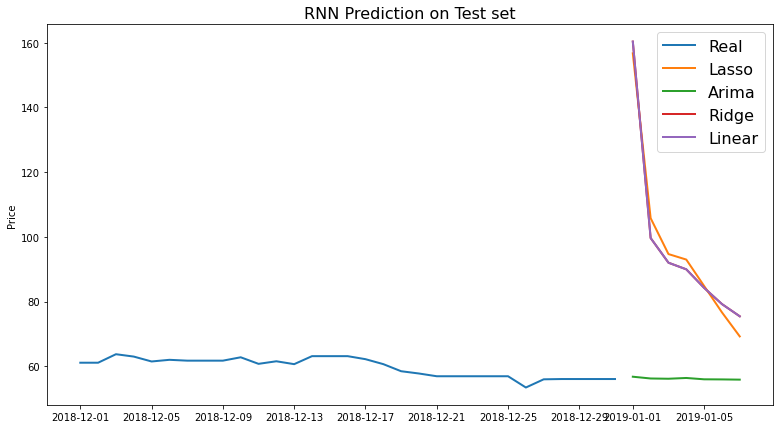

In [326]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_subset['2018-12-01' : '2018-12-31'].loc[:, 'price'], label='Real', linewidth=2)
ax.plot(CombinedResult['Lasso'], label='Lasso', linewidth=2)
ax.plot(CombinedResult['Arima'], label='Arima', linewidth=2)
ax.plot(CombinedResult['Ridge'], label='Ridge', linewidth=2)
ax.plot(CombinedResult['Linear'], label='Linear', linewidth=2)
ax.set_ylabel('Price')
ax.set_title('RNN Prediction on Test set', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()